In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")


# Mindsight case

"estudo quantitativo que possibilite tomar melhores decisões no momento de contratar e/ou fazer movimentações internas." 

Dados:
- testes psicométricos de funcionários
- avaliação de desempenho
- Áreas.

Possibilidade:
- Fazer um modelo que prediz a performance da pessoa baseada nos testes e na área

## Preparação e entendimento dos dados

Dados da área

In [3]:
#Área data
df_area = pd.read_csv('raw_data/area_raw_data.csv')
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CPF     4394 non-null   object
 1   Área    4394 non-null   object
dtypes: object(2)
memory usage: 68.8+ KB


Dados de performance

In [14]:
#Performance data
df_per = pd.read_csv('raw_data/performance_raw_data.csv')
df_per['AveragePerformance'] = df_per.mean(axis=1) #Average Performance column added
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPF                  2382 non-null   object 
 1   Performance 1º/2019  1547 non-null   float64
 2   Performance 2º/2018  1577 non-null   float64
 3   Performance 1º/2018  988 non-null    float64
 4   Performance 2º 2017  353 non-null    float64
 5   AveragePerformance   1617 non-null   float64
dtypes: float64(5), object(1)
memory usage: 111.8+ KB


In [15]:
df_per = df_per.drop(['Performance 1º/2019','Performance 2º/2018','Performance 1º/2018','Performance 2º 2017'],axis=1)
df_per.describe()

,AveragePerformance
count,1617.000000
mean,1.977170
std,0.453591
min,1.000000
25%,1.666667
50%,2.000000
75%,2.333333
max,3.000000


Dados teste psicométrico

In [11]:
#Psicometric tests data
df_psy= pd.read_csv('raw_data/psyctest_raw_data.csv')
print(df_psy.columns)

Index(['Nome', 'Sobrenome', 'E-mail', 'CPF', 'Match', 'Potencial Bruto',
       'Raciocínio', 'Social', 'Motivacional', 'Cultura pontuação',
       'Cultura classificação', 'atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos', 'perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibil

In [12]:
not_useful_for_now_labels = ["Nome",'Sobrenome','E-mail','Match',
                            "URL Raciocínio","URL Cultura","URL Social","URL Motivacional","URL Perfil",
                            'Início - Perfil','Fim - Perfil','Início - Motivacional','Fim - Motivacional','Início - Social','Fim - Social',
                            "Início - Raciocínio",'Fim - Raciocínio','Início - Cultura','Fim - Cultura']
df_psy = df_psy.drop(not_useful_for_now_labels, axis=1)
df_psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CPF                                  4281 non-null   object 
 1   Potencial Bruto                      928 non-null    float64
 2   Raciocínio                           3234 non-null   float64
 3   Social                               981 non-null    float64
 4   Motivacional                         956 non-null    float64
 5   Cultura pontuação                    3311 non-null   float64
 6   Cultura classificação                3311 non-null   object 
 7   atributo-Capacidade analítica        921 non-null    float64
 8   atributo-Pensamento conceitual       921 non-null    float64
 9   atributo-Reflexão                    921 non-null    float64
 10  atributo-Pensamento criativo         921 non-null    float64
 11  atributo-Planejamento e organi

- Cultura classificação: (str) feito a partir de Cultura pontuação -> redundante

In [16]:
df_psy = df_psy.drop(['Cultura classificação'],axis=1)

Juntando os dados por CPF:

In [21]:
print('Área:',len(df_area))
print('Testes psi:',len(df_psy))
print('Performance:',len(df_per))

Área: 4394
Testes psi: 4281
Performance: 2382


In [23]:
df_area_psy = df_area.merge(df_psy,on="CPF")
df_area_psy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 0 to 4280
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CPF                                  4281 non-null   object 
 1   Área                                 4281 non-null   object 
 2   Potencial Bruto                      928 non-null    float64
 3   Raciocínio                           3234 non-null   float64
 4   Social                               981 non-null    float64
 5   Motivacional                         956 non-null    float64
 6   Cultura pontuação                    3311 non-null   float64
 7   atributo-Capacidade analítica        921 non-null    float64
 8   atributo-Pensamento conceitual       921 non-null    float64
 9   atributo-Reflexão                    921 non-null    float64
 10  atributo-Pensamento criativo         921 non-null    float64
 11  atributo-Planejamento e organi

In [53]:
df_noPer = df_area_psy[df_area_psy.CPF.isin(df_per.CPF) == False] #data with no CPF on performance dataset
print(len(df_noPer),len(df_area_psy)-len(df_noPer))

df = df_per.merge(df_area_psy,on='CPF') #data with CPF on performance dataset
print(len(df))
#save data data with no CPF on performance dataset or with CPF but no performance value
pd.concat([df_noPer,df[df['AveragePerformance'].isna()]]).to_csv("presentation_data/test_data_without_performance.csv",index=False)

df = df[df['AveragePerformance'].isna() == False]
df.to_csv("presentation_data/training_data_with_performance.csv",index=False)
df = df.drop(['CPF'],axis =1)

2012 2269
2269


In [58]:
df.describe()

,AveragePerformance,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,...,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos
count,1526.000000,351.000000,1162.000000,368.000000,363.000000,1188.000000,345.000000,345.000000,345.000000,345.000000,...,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.974498,51.497123,50.938107,50.265245,54.092424,45.359057,56.539014,50.145304,44.830696,48.628116,...,48.800212,52.864271,54.009310,49.127294,47.124430,53.837215,51.524218,50.998196,42.068674,39.951989
std,0.443040,11.994322,19.602097,18.062419,18.470780,17.117602,22.650306,21.210591,20.369404,21.435059,...,17.476189,19.866740,21.528342,20.600768,16.051692,21.201156,19.062317,15.662966,15.511952,15.518003
min,1.000000,12.250000,7.980000,5.670000,5.550000,0.350000,7.240000,5.860000,3.120000,0.000000,...,7.440000,6.140000,6.140000,6.140000,7.440000,6.140000,8.740000,8.740000,7.440000,4.840000
25%,1.666667,43.675000,37.330000,37.650000,41.170000,32.537500,39.260000,33.650000,29.210000,32.700000,...,37.410000,37.410000,37.410000,32.860000,32.860000,37.410000,37.410000,41.950000,32.860000,28.320000
50%,2.000000,51.600000,52.660000,50.820000,51.560000,43.640000,59.240000,52.030000,45.650000,48.380000,...,46.500000,55.590000,55.590000,46.500000,46.500000,55.590000,51.050000,51.050000,41.950000,41.950000
75%,2.333333,60.110000,65.390000,63.990000,67.140000,57.620000,76.060000,66.380000,59.200000,65.010000,...,60.140000,69.230000,69.230000,64.680000,60.140000,69.230000,64.680000,60.140000,51.050000,51.050000
max,3.000000,84.540000,93.320000,93.860000,95.340000,100.000000,100.000000,94.330000,89.710000,98.230000,...,91.860000,93.160000,91.860000,93.160000,90.560000,93.160000,91.860000,91.860000,82.860000,82.860000


Categorias possíveis:
- Potencial Bruto (~350): é uma média ponderada de 40%Raciocínio, 35%Social e 25%Motivacional -> Sintetiza as 3 habilidades
- Cultura pontuação(~1200)
- Habilidades: Raciocínio(~1200), Social(~350), Motivacional(~350)
- Perfil (~350): autoavaliação em 16 características
- Atributo (~350): tendências do comportamento em 16 atributos -> A partir das 3 habilidades + autoavaliaçao

Possibilidades de uso dos dados:
- Potencial Bruto + Cultura + Atributo
- 3Habilidades + Cultura + Perfil

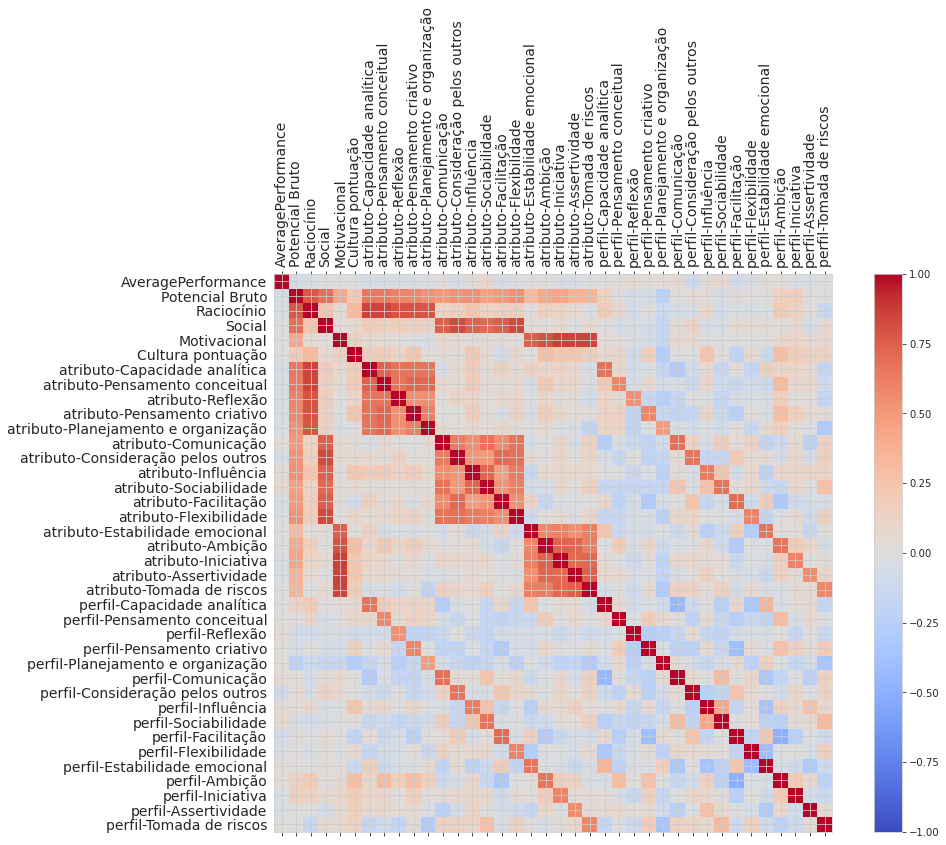

In [57]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number,cmap=plt.cm.coolwarm,vmin = -1,vmax=1)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

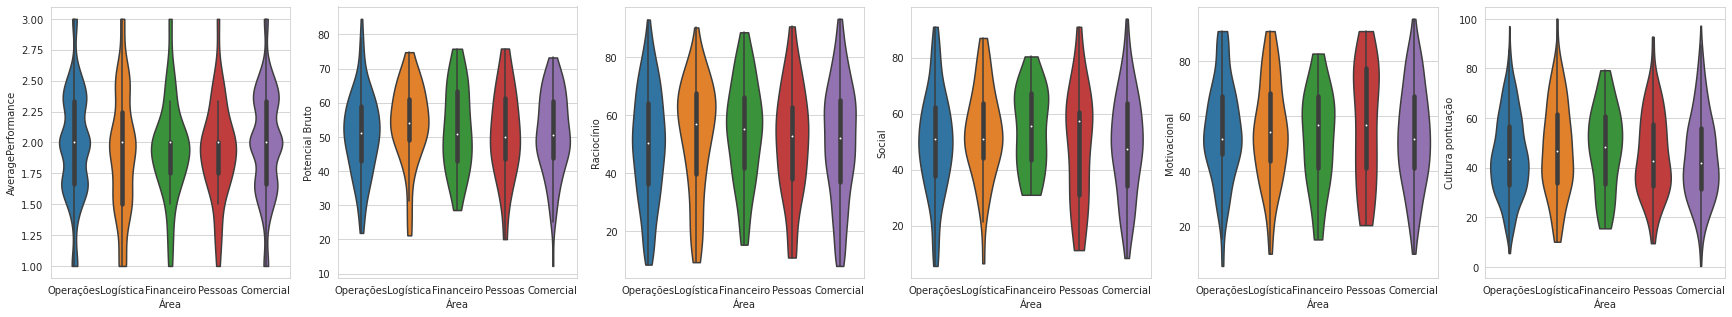

In [68]:
#Check the distribution of values in each Área
f, axes = plt.subplots(1,6,figsize=(30,5))
i=0
for feature in ["AveragePerformance",'Potencial Bruto',
       'Raciocínio', 'Social', 'Motivacional', 'Cultura pontuação']:
    sns.violinplot(data=df, x = "Área", y = feature,cut=0,ax=axes[i])
    i+=1

## Modelo

In [115]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [131]:
def grid_model(model_name,inputer = 'drop'):

    if model_name == 'rfr':
        model = RandomForestRegressor(random_state=0)

        #hypeparameters combination of random forest model to test in the grid search
        hyper_params = {
        'model__n_estimators': [3,5,10,20], 
        'model__max_depth': [2,3,5,10], 
        #'model__min_samples_split':[2,6]
        }

    elif model_name == 'svr':
        model = SVR(kernel = 'rbf')

    elif model_name == 'lr':
        model = LinearRegression()
        hyper_params = {
        'model__n_jobs': [1,3],   
        }
    
    elif model_name == 'lasso':
        model = Lasso(random_state=0, max_iter=50000)
        hyper_params = {
        'model__alpha': np.logspace(-4, -0.5, 5),   
        }

    elif model_name == 'ridge':
        model = Ridge()
        hyper_params = {
        'model__alpha': [0.1,1.0],     
        }

    #defining the pipeline steps for each model
    if inputer == 'constant':
        pipeline = imbpipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='constant',add_indicator=True)), #transform: solve missing values 
        ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
        ('model',model)  #classifier: constructs a lot of decision trees and uses the class selected by most trees
                            ])
    
    elif inputer == 'mean':
        pipeline = imbpipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='mean',add_indicator=True)), #transform: solve missing values 
        ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
        ('model',model)  #classifier: constructs a lot of decision trees and uses the class selected by most trees
                            ])
    
    elif inputer == 'drop':
        pipeline = imbpipeline(steps=[
        ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
        ('model',model)  #classifier: constructs a lot of decision trees and uses the class selected by most trees
                            ])

    elif inputer == 'KNN':
        pipeline = imbpipeline(steps=[
        ('imputer', KNNImputer(missing_values=np.nan,n_neighbors = 3,add_indicator=True)), #transform: solve missing values 
        ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
        ('model',model)  #classifier: constructs a lot of decision trees and uses the class selected by most trees
                            ])


    # grid search definition
    grid = GridSearchCV(
        pipeline,
        param_grid = hyper_params,
        scoring = 'neg_mean_squared_error',   #balance between precision (true positives compared to all the positives) and recall(trues found compared to the total trues)
        cv = 5,
        n_jobs = 1)

    return grid


atributos = ['atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos']
perfil = ['perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibilidade', 'perfil-Estabilidade emocional',
       'perfil-Ambição', 'perfil-Iniciativa', 'perfil-Assertividade',
       'perfil-Tomada de riscos']

#- Potencial Bruto + Cultura + Atributo
#- 3Habilidades + Cultura + Perfil
def select_features(df,atributos,perfil,option='all'):
    if option == 'all':
        return df
    elif option == 'Pot_Cult_Atr':
        list_features = ['AveragePerformance','Potencial Bruto','Cultura pontuação']+ atributos
        return df[list_features]
    elif option == 'Hab_Cult_Per':
        list_features = ['AveragePerformance','Raciocínio', 'Social', 'Motivacional','Cultura pontuação']+ perfil
        return df[list_features]
    elif option == 'Hab_Cult':
        list_features = ['AveragePerformance','Raciocínio', 'Social', 'Motivacional','Cultura pontuação']
        return df[list_features]
    elif option == 'test':
        list_features = ['AveragePerformance','Cultura pontuação']
        return df[list_features]
    

In [132]:
df = pd.read_csv("presentation_data/training_data_with_performance.csv").drop(['CPF'],axis =1)
print(df['Área'].unique())
df['Área'] = df['Área'].map({'Operações':0, 'Logística':1, 'Financeiro':2, 'Pessoas':3, 'Comercial':4})

['Operações' 'Logística' 'Financeiro' 'Pessoas' 'Comercial']


In [134]:
results = {}
for inputer in ['constant','drop','KNN']:#'mean',
    for model_name in ['lr','rfr']:#,'lasso','ridge']:
        print(model_name)
        grid = grid_model(model_name,inputer)

        for list_features in ['test','Hab_Cult','Pot_Cult_Atr','Hab_Cult_Per','all']:
            df_training = select_features(df,atributos,perfil,option=list_features)
            
            if inputer == 'drop':
                df_training = df_training.dropna(axis=0,how='any')
            y = df_training.AveragePerformance                                 #target prediction
            X = df_training.drop(['AveragePerformance'], axis = 1)

            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

            grid = grid.fit(X_train, y_train)
            prediction = grid.predict(X_test)
            print(inputer,list_features,round(mean_squared_error(y_test, prediction),4))

lr
constant test 0.1658
constant Hab_Cult 0.1658
constant Pot_Cult_Atr 0.1646
constant Hab_Cult_Per 0.1653
constant all 0.1695
rfr
constant test 0.165
constant Hab_Cult 0.1663
constant Pot_Cult_Atr 0.1667
constant Hab_Cult_Per 0.1659
constant all 0.1663
lr
drop test 0.1973
drop Hab_Cult 0.1971
drop Pot_Cult_Atr 0.1998
drop Hab_Cult_Per 0.2578
drop all 0.2728
rfr
drop test 0.1977
drop Hab_Cult 0.1962
drop Pot_Cult_Atr 0.2013
drop Hab_Cult_Per 0.2679
drop all 0.2623
lr
KNN test 0.1658
KNN Hab_Cult 0.1654
KNN Pot_Cult_Atr 0.1651
KNN Hab_Cult_Per 0.1669
KNN all 0.1677
rfr
KNN test 0.1634
KNN Hab_Cult 0.1647


constant Hab_Cult 0.1815
constant Pot_Cult_Atr 0.1819
constant Hab_Cult_Per 0.1831
constant all 0.1824
rfr
mean Hab_Cult 0.181
mean Pot_Cult_Atr 0.1808
mean Hab_Cult_Per 0.1814
mean all 0.1818
rfr
drop Hab_Cult 0.2277
drop Pot_Cult_Atr 0.1964
drop Hab_Cult_Per 0.2581
drop all 0.2596
rfr
KNN Hab_Cult 0.182
KNN Pot_Cult_Atr 0.1802
KNN Hab_Cult_Per 0.18
KNN all 0.1805